**Import the required libraries**

In [208]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

--------------------------

Read the data from the input csv file

In [209]:
day = pd.read_csv('day.csv')
#day.set_index('instant',inplace=True)
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


-------------------------------

Check the information of the dataset which includes the number of columns in the dataset and type of columns

In [210]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


--------------------

Check if any duplicate rows present in the given dataset

In [211]:
day.duplicated().sum()

0

In [212]:
print('\033[1m','\033[91m','There are',day.duplicated().sum(),'\033[91m','duplicate values in the dateset.''\033[1m') 

  There are 0  duplicate values in the dateset.


Check if any null column values present in the dataset

In [213]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

------------------------

Describe the dataset

In [214]:
day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


We can set the instant as the index as it's a unique identifier

In [215]:
day.set_index('instant',inplace=True)
day.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822


-------------------

Columns such as dteday, yr, mnth seems redundant and therefore, dropping 'yr' and 'mnth'\

In [216]:
day.drop(["yr","mnth"], axis=1, inplace=True)
day.head()

,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


---------------------------------

We already have workingday column which can explain whether it is holiday or workingday therefore, dropping 'holiday'

In [217]:
day.drop(["holiday"], axis=1, inplace=True)
day.head()

,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,
1,01-01-2018,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


--------------------------------

### Will Extract month and year from dteday column

In [218]:
day['month'] = pd.to_datetime(day['dteday']).dt.month_name()
day['year'] = pd.to_datetime(day['dteday']).dt.year

<ipython-input-218-d8add332f99d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day['month'] = pd.to_datetime(day['dteday']).dt.month_name()
<ipython-input-218-d8add332f99d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day['year'] = pd.to_datetime(day['dteday']).dt.year


In [219]:
day.drop(["dteday"], axis=1, inplace=True)
day.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
instant,,,,,,,,,,,,,
1,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018
2,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018
3,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018
4,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018
5,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018


In [220]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   weekday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   weathersit  730 non-null    int64  
 4   temp        730 non-null    float64
 5   atemp       730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   casual      730 non-null    int64  
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  month       730 non-null    object 
 12  year        730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.8+ KB


-------------------------------

Lets convert these column data types

In [221]:
day["weekday"]=day.weekday.astype("category")
day["season"]=day.season.astype("category")
day["weathersit"]=day.weathersit.astype("category")

In [222]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   weekday     730 non-null    category
 2   workingday  730 non-null    int64   
 3   weathersit  730 non-null    category
 4   temp        730 non-null    float64 
 5   atemp       730 non-null    float64 
 6   hum         730 non-null    float64 
 7   windspeed   730 non-null    float64 
 8   casual      730 non-null    int64   
 9   registered  730 non-null    int64   
 10  cnt         730 non-null    int64   
 11  month       730 non-null    object  
 12  year        730 non-null    int64   
dtypes: category(3), float64(4), int64(5), object(1)
memory usage: 65.5+ KB


In [223]:
# Will need mapping of the seasons, weekday & weathersit columns as below for better understanding the relation
day.season=day.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
day.weekday=day.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"})
day.weathersit=day.weathersit.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Rainfall"})

In [224]:
print('There are ',day.shape[0],'rows and ',day.shape[1],'columns in the dataset.')

There are  730 rows and  13 columns in the dataset.


In [225]:
print('The Standard Deviation of Profit is', day['cnt'].describe().std(),
      '\n''And the Mean of Profit is',day['cnt'].describe().mean())

The Standard Deviation of Profit is 2863.2942861331426 
And the Mean of Profit is 3699.283562084541


In [226]:
day.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [227]:
day.head(10)

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,month,year
instant,,,,,,,,,,,,,
1,Spring,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,January,2018
2,Spring,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,February,2018
3,Spring,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,March,2018
4,Spring,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,April,2018
5,Spring,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,May,2018
6,Spring,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606,June,2018
7,Spring,Sun,0,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510,July,2018
8,Spring,Mon,1,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959,August,2018
9,Spring,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822,September,2018


---------------------------------

# EDA

In [228]:
day.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-228-fdfabe262dbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr().style.background_gradient(cmap='coolwarm')


,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year
workingday,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640,-0.011852
temp,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.048789
atemp,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.047215
humidity,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.112547
windspeed,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.011624
casual,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,0.250502
registered,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.596911
count,-0.027640,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,0.569728
year,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,1.000000


<ipython-input-229-d647e3ad8342>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day.corr(),annot=True,cmap='Blues')


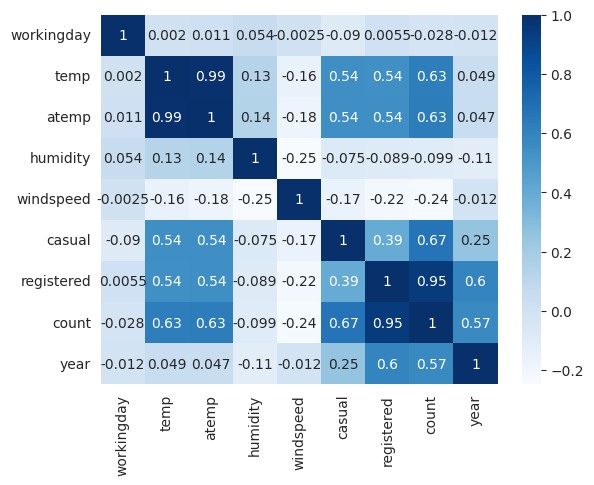

In [229]:
sns.heatmap(day.corr(),annot=True,cmap='Blues')
plt.show()

**We can see that there is high positive corralation between count of bike rentals and the registered customers. And there is a negetive correlation between count of bike rentals and humadity, windspeed and workingday columns**

-------------------------------

**Visualisation**

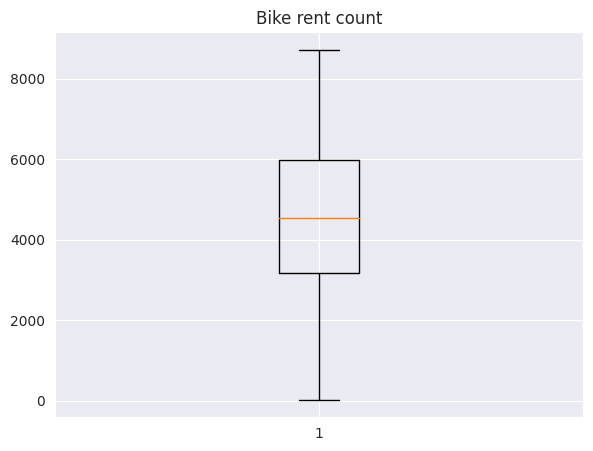

In [230]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(day['count'])
plt.title("Bike rent count")
plt.show()

<ipython-input-231-1fa2fefeaaf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day['count'])


<Axes: xlabel='count', ylabel='Density'>

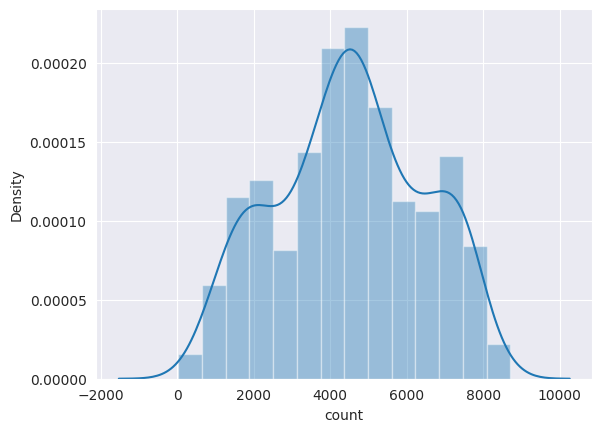

In [231]:
sns.distplot(day['count'])

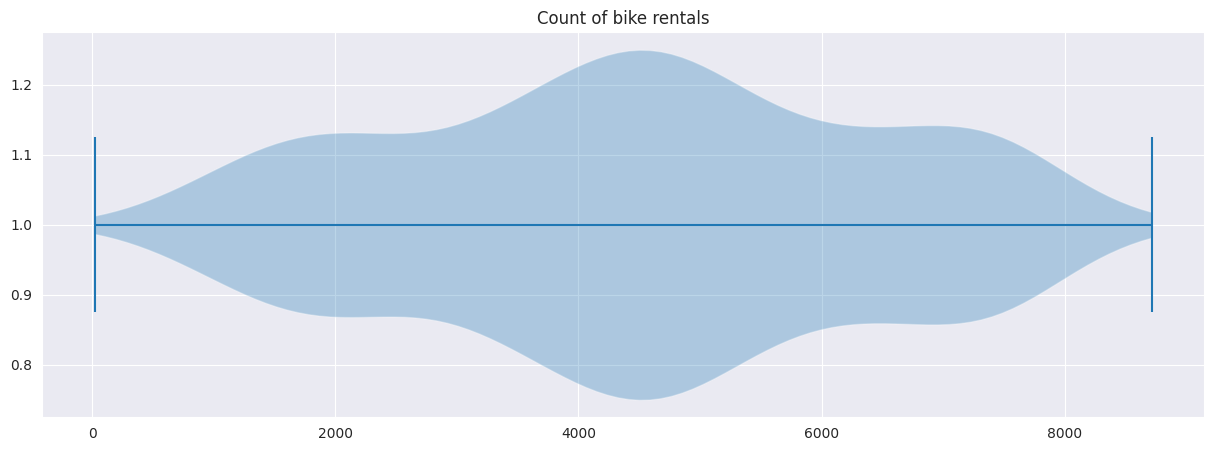

In [232]:
plt.figure(figsize=(15,5))
plt.violinplot(day['count'],vert=False)
plt.title("Count of bike rentals")
plt.show()

**Looking at the above three diagrams, we can see the 'count' data distributes almost symetrically with no outliers.**

<ipython-input-233-19b65487ffd8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day.groupby('month').sum().sort_values('count', ascending= True)[['count']].plot.bar()


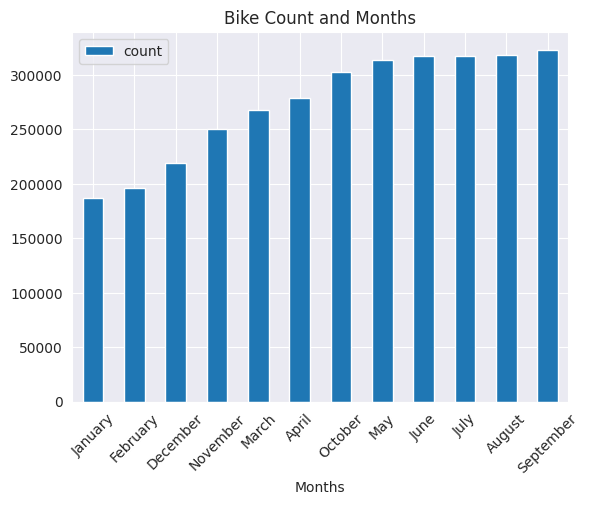

In [233]:
day.groupby('month').sum().sort_values('count', ascending= True)[['count']].plot.bar()
plt.title('Bike Count and Months')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.show()

**Could see there are more bike rentals booked in these months September, August, July, June and May**

-----------------------------

<ipython-input-234-654d665f73ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day.groupby('weekday').sum().sort_values('count', ascending= True)[['count']].plot.bar()


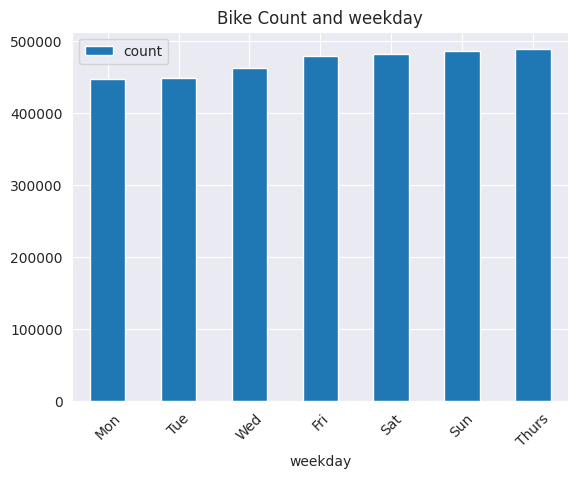

In [234]:
day.groupby('weekday').sum().sort_values('count', ascending= True)[['count']].plot.bar()
plt.title('Bike Count and weekday')
plt.xlabel('weekday')
plt.xticks(rotation = 45)
plt.show()

**weekdays have no significant impact, but if we closely observe, biking is preferred on Thursday, Friday, Saturday and Sundays**

-------------------------------------

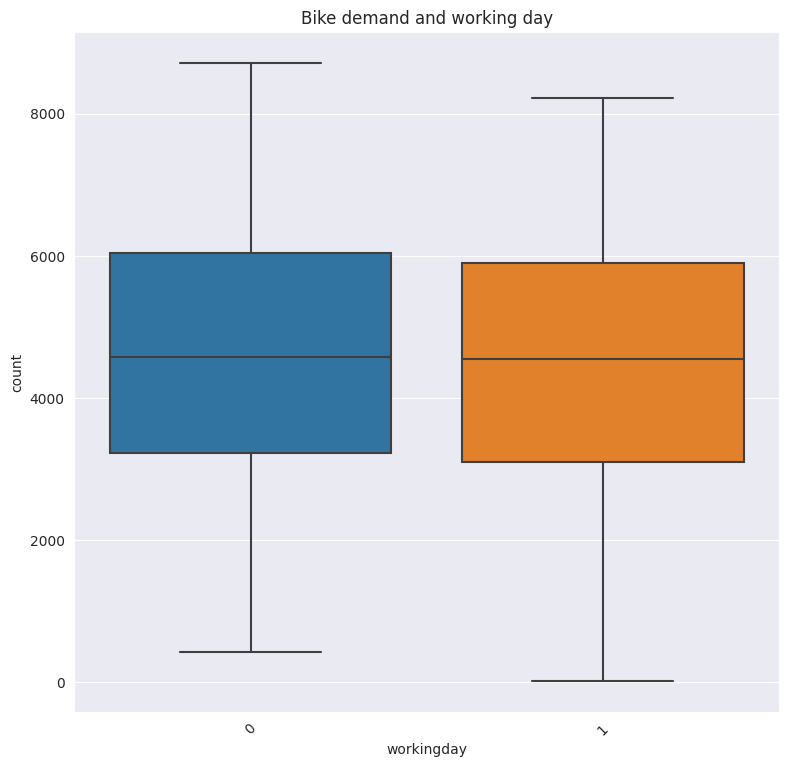

In [235]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'workingday', y = 'count', data = day).set_title('Bike demand and working day')
plt.xticks(rotation = 45)
plt.show()

**Based on the above, can say there is more demand for bike rentals on holidays than on workingdays**

----------------------------

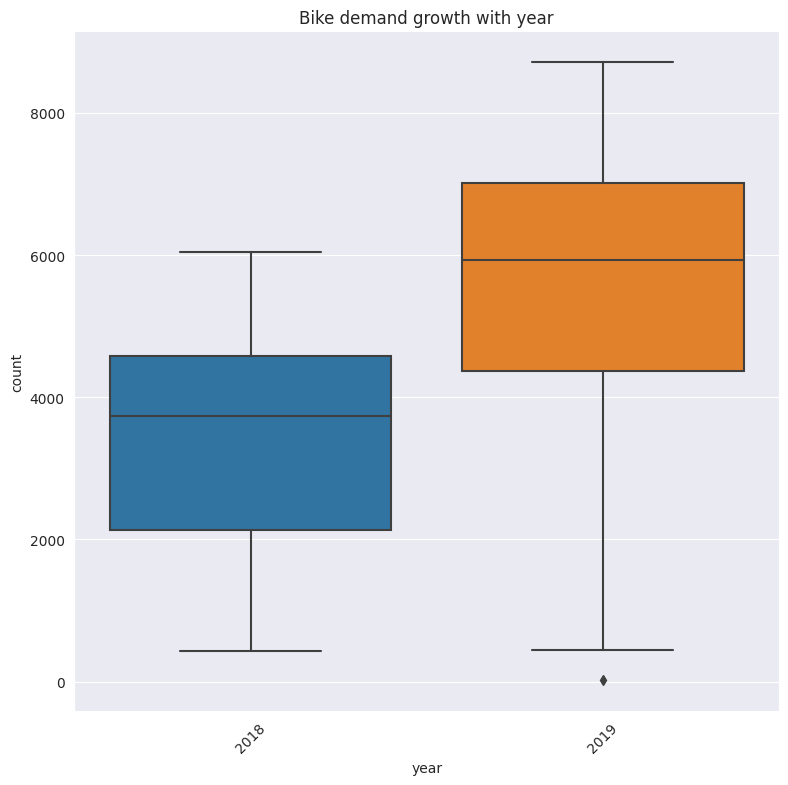

In [236]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'year', y = 'count', data = day).set_title('Bike demand growth with year')
plt.xticks(rotation = 45)
plt.show()

**Based on the above, can say there is more demand for bike rentals in 2019 year than in 2018 year**

----------------------------

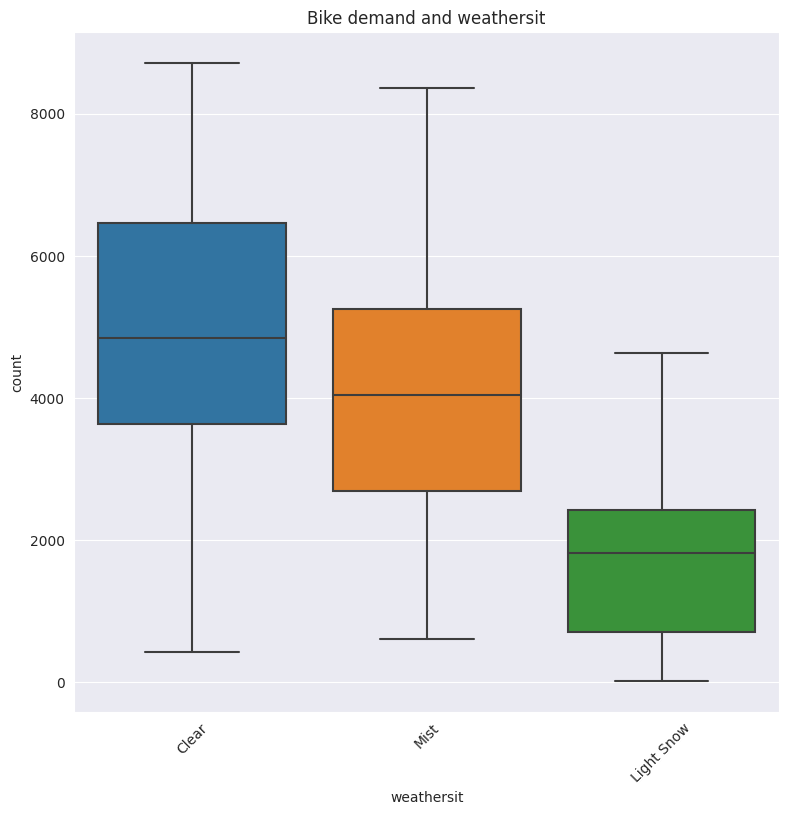

In [237]:
plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'weathersit', y = 'count', data = day).set_title('Bike demand and weathersit')
plt.xticks(rotation = 45)
plt.show()

**There is a high demand in the bike rentals when weather condition is clear than when it is mist/light snow**

-------------------------Do multivariate analysis----------------

**Model Development**

In [238]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   weekday     730 non-null    category
 2   workingday  730 non-null    int64   
 3   weathersit  730 non-null    category
 4   temp        730 non-null    float64 
 5   atemp       730 non-null    float64 
 6   humidity    730 non-null    float64 
 7   windspeed   730 non-null    float64 
 8   casual      730 non-null    int64   
 9   registered  730 non-null    int64   
 10  count       730 non-null    int64   
 11  month       730 non-null    object  
 12  year        730 non-null    int64   
dtypes: category(3), float64(4), int64(5), object(1)
memory usage: 65.5+ KB


In [239]:
#day1 = day.copy()
#day1.head()

In [240]:
#day1['month']=day1['month'].astype('category')

In [241]:
#day["month"] = day["month"].astype(object).astype(str)

In [242]:
codes = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}


In [243]:
day['month'] = day['month'].map(codes)

In [244]:
codes = {2019:1,2018:0}
day['year'] = day['year'].map(codes)

In [245]:
codes = {'Clear':1,'Mist':2,'Light Snow':3,'Heavy Rain':4}
day['weathersit'] = day['weathersit'].map(codes)

In [246]:
day.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [247]:
codes = {'Spring':1,'Summer':2,'Fall':3,'Winter':4}
day['season'] = day['season'].map(codes)

In [248]:
codes = {'Mon':0,'Tue':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}
day['weekday'] = day['weekday'].map(codes)

In [249]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [250]:
day.tail()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,month,year
instant,,,,,,,,,,,,,
726,1,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,12,1
727,1,5,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,12,1
728,1,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,12,1
729,1,0,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,12,1
730,1,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729,12,1


**spliting Dataset in Dependent & Independent Variables**

In [251]:
y_col = 'count'
y = day[y_col]
X = day[day.columns.drop(y_col)]

In [252]:
y.head()

instant
1     985
2     801
3    1349
4    1562
5    1600
Name: count, dtype: int64

In [253]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [254]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (547, 12)
Shape of X_test:  (183, 12)
Shape of y_train:  (547,)
Shape of y_test (183,)


In [255]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [256]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
RMSE:  1.1934992660835325e-12


--**Use Random Forest classifier to know feature importance**

-------------------------------

In [257]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [258]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

windspeed     0.128546
registered    0.126392
humidity      0.125580
casual        0.124534
temp          0.119214
atemp         0.119141
month         0.079066
weekday       0.065118
season        0.038683
weathersit    0.028863
year          0.025348
workingday    0.019516
dtype: float64

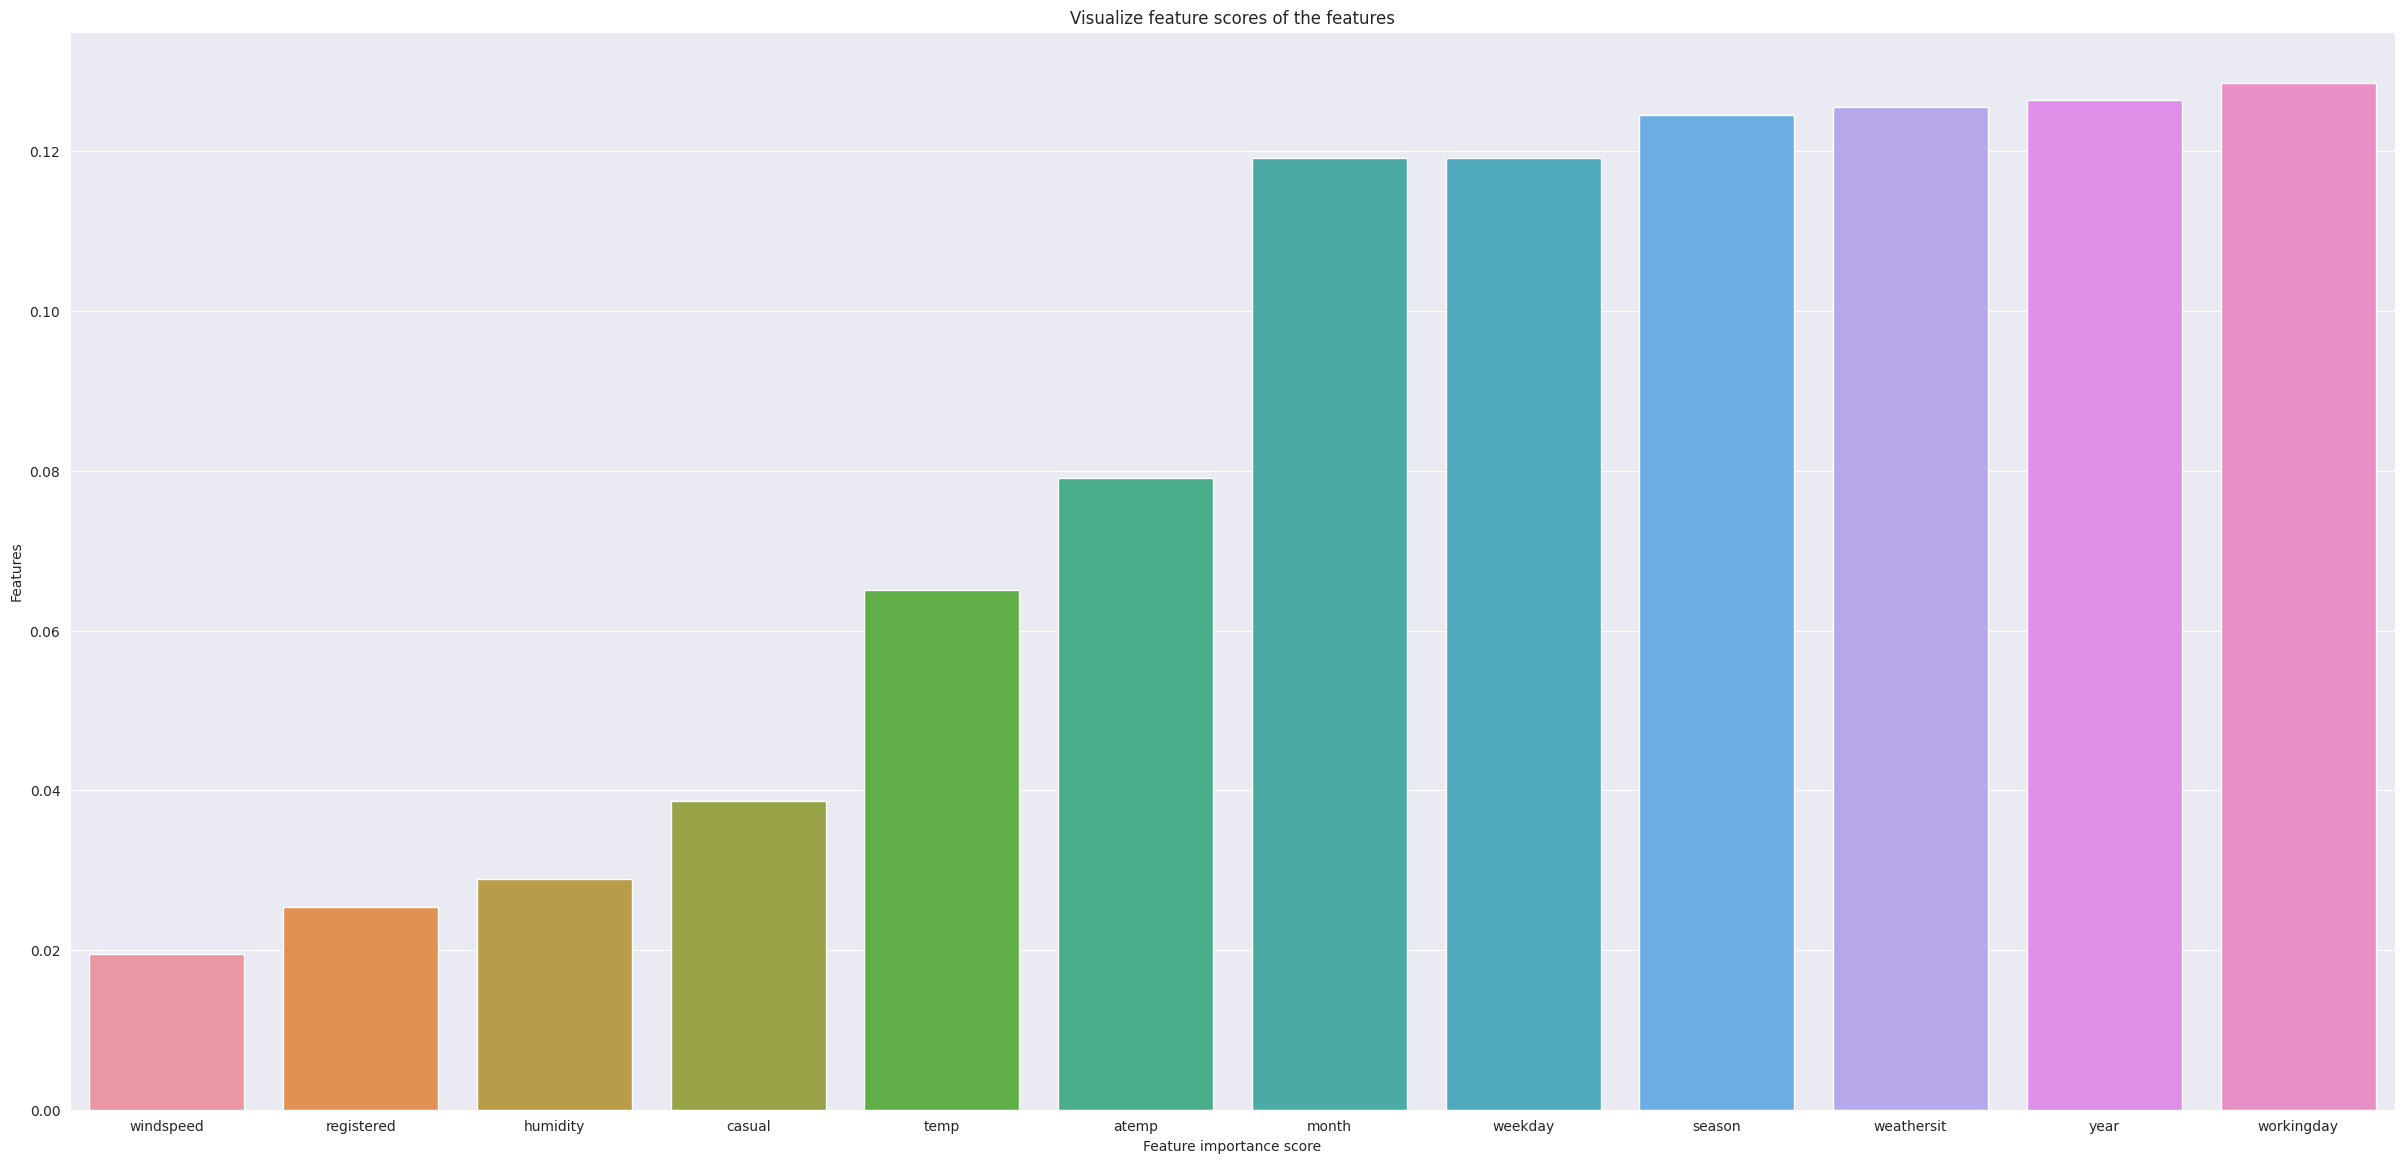

In [259]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=feature_scores)
ax.set_title("Visualize feature scores of the features")
#ax.set_yticklabels(feature_scores)
ax.set_xticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Removing 2nd least important feature and running the LinearRegression model

In [260]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['workingday'], axis=1)

X_test = X_test.drop(['workingday'], axis=1)

In [261]:
from sklearn.linear_model import LinearRegression
regressor_linear1 = LinearRegression()
regressor_linear1.fit(X_train, y_train)

LinearRegression()

In [262]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear1 = cross_val_score(estimator = regressor_linear1, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train1 = regressor_linear1.predict(X_train)
r2_score_linear_train1 = r2_score(y_train, y_pred_linear_train1)

# Predicting R2 Score the Test set results
y_pred_linear_test1 = regressor_linear1.predict(X_test)
r2_score_linear_test1 = r2_score(y_test, y_pred_linear_test1)

# Predicting RMSE the Test set results
rmse_linear1 = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test1)))
print("CV: ", cv_linear1.mean())
print('R2_score (train): ', r2_score_linear_train1)
print('R2_score (test): ', r2_score_linear_test1)
print("RMSE: ", rmse_linear1)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
RMSE:  8.323833452973303e-13


---Removing 2nd least important feature and running the LinearRegression model---------

In [263]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['year'], axis=1)

X_test = X_test.drop(['year'], axis=1)

In [264]:
from sklearn.linear_model import LinearRegression
regressor_linear2 = LinearRegression()
regressor_linear2.fit(X_train, y_train)

LinearRegression()

In [265]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear2 = cross_val_score(estimator = regressor_linear2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train2 = regressor_linear2.predict(X_train)
r2_score_linear_train2 = r2_score(y_train, y_pred_linear_train2)

# Predicting R2 Score the Test set results
y_pred_linear_test2 = regressor_linear2.predict(X_test)
r2_score_linear_test2 = r2_score(y_test, y_pred_linear_test2)

# Predicting RMSE the Test set results
rmse_linear2 = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test2)))
print("CV: ", cv_linear1.mean())
print('R2_score (train): ', r2_score_linear_train2)
print('R2_score (test): ', r2_score_linear_test2)
print("RMSE: ", rmse_linear2)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
RMSE:  1.9486859501505735e-12


----------------------